# Unsupervised Learning

# K-means

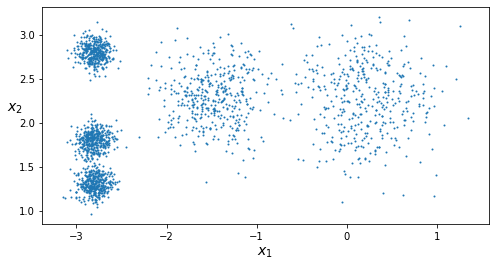

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()    

In [4]:
from sklearn.cluster import KMeans

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Clustering for Image Segmentation

In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [7]:
image = imread('images/ladybug.png')
image.shape

(533, 800, 3)

In [8]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [9]:
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

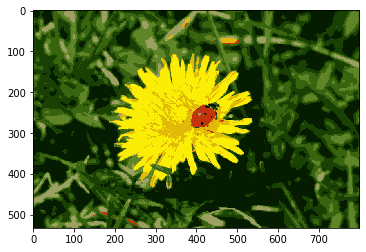

In [10]:
plt.imshow(segmented_img)

# Clustering for semi-supervised learning

In [11]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
n_labeled = 50
log_reg = LogisticRegression()
# log_reg.fit(X_digits)

In [15]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)

In [16]:
X_digits_dist.shape

(1347, 50)

In [17]:
np.argmin(X_digits_dist, axis=0)

array([ 249,   11,  159,  987,  861, 1092, 1121, 1024,  648,  188,  841,
        602,  911,  817,  481, 1071,  398,  629,  459,  504,  460,  827,
        891,  795,  292,   26,  704,  587, 1057,   50, 1168,  485,   23,
       1334,  114,  753,  776,  565,  577,  194,  791, 1208,  325,  525,
        205,  559, 1022, 1284,  256,  509])

# DBSCAN

# Gaussian Mixtures

In [18]:
from sklearn.mixture import GaussianMixture

In [21]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [24]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [25]:
gm.weights_

array([0.20954915, 0.40004337, 0.39040749])

In [26]:
gm.means_

array([[ 3.40011393,  1.05931676],
       [-1.40765148,  1.42718339],
       [ 0.0516183 ,  0.07550754]])

In [27]:
gm.covariances_

array([[[ 1.14631283, -0.03285453],
        [-0.03285453,  0.95505142]],

       [[ 0.63477114,  0.72969538],
        [ 0.72969538,  1.16085164]],

       [[ 0.68856426,  0.79633822],
        [ 0.79633822,  1.21252023]]])